# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [66]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [67]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]
        #print(json.dumps(response, indent=4, sort_keys=True))
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
    
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": str(city_max_temp),
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": str(city_wind),
                         "Country": city_country,
                         "Date": city_date})
        #print(json.dumps(city_data, indent=4, sort_keys=True))
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | tobelo
Processing Record 3 of Set 1 | brody
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | sinabang
Processing Record 9 of Set 1 | pandan
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | port saint john's
Processing Record 14 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 15 of Set 1 | kenora
Processing Record 16 of Set 1 | kourou
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | yatou
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of

Processing Record 39 of Set 4 | taoudenni
Processing Record 40 of Set 4 | pingshan
Processing Record 41 of Set 4 | berezovyy
Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | kiunga
Processing Record 45 of Set 4 | vizinga
Processing Record 46 of Set 4 | colonia
Processing Record 47 of Set 4 | brookings
Processing Record 48 of Set 4 | capitao poco
Processing Record 49 of Set 4 | brokopondo
Processing Record 0 of Set 5 | birzebbuga
Processing Record 1 of Set 5 | san antonio
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | lihue
Processing Record 4 of Set 5 | calabugao
Processing Record 5 of Set 5 | ahau
City not found. Skipping...
Processing Record 6 of Set 5 | flying fish cove
Processing Record 7 of Set 5 | puerto madero
Processing Record 8 of Set 5 | cambria
Processing Record 9 of Set 5 | aasiaat
Processing Record 10 of Set 5 | ixtapa
Processing Record 11 of Set 5 | al bardiyah
Processing Record 12 of Set

Processing Record 28 of Set 8 | guerrero negro
Processing Record 29 of Set 8 | mapastepec
Processing Record 30 of Set 8 | chonchi
Processing Record 31 of Set 8 | kuta
Processing Record 32 of Set 8 | waingapu
Processing Record 33 of Set 8 | mejit
Processing Record 34 of Set 8 | nezhinka
Processing Record 35 of Set 8 | choma
Processing Record 36 of Set 8 | haderslev
Processing Record 37 of Set 8 | wenchang
Processing Record 38 of Set 8 | hengchun
Processing Record 39 of Set 8 | mangai
Processing Record 40 of Set 8 | anatuya
Processing Record 41 of Set 8 | barbacoas
Processing Record 42 of Set 8 | raja
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | niquero
Processing Record 45 of Set 8 | mormugao
Processing Record 46 of Set 8 | montemor-o-novo
Processing Record 47 of Set 8 | argo
Processing Record 48 of Set 8 | carutapera
Processing Record 49 of Set 8 | faya-largeau
Processing Record 0 of Set 9 | hadibu
Processing Record 1 of Set 9 | san luis de la loma
Processin

Processing Record 16 of Set 12 | cururupu
Processing Record 17 of Set 12 | port isabel
Processing Record 18 of Set 12 | naze
Processing Record 19 of Set 12 | lae
Processing Record 20 of Set 12 | saraqib
Processing Record 21 of Set 12 | as saffaniyah
Processing Record 22 of Set 12 | tambacounda
Processing Record 23 of Set 12 | galax
Processing Record 24 of Set 12 | san antonio de pale
Processing Record 25 of Set 12 | san fernando
Processing Record 26 of Set 12 | teruel
Processing Record 27 of Set 12 | eyl
Processing Record 28 of Set 12 | altamirano
Processing Record 29 of Set 12 | santa elena
Processing Record 30 of Set 12 | mumford
Processing Record 31 of Set 12 | manado
Processing Record 32 of Set 12 | mukalla
Processing Record 33 of Set 12 | karis
Processing Record 34 of Set 12 | vorgashor
Processing Record 35 of Set 12 | portel
Processing Record 36 of Set 12 | wanning
Processing Record 37 of Set 12 | queenstown
Processing Record 38 of Set 12 | erenhot
Processing Record 39 of Set 12 

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = {"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                        "Date": city_date}
                        
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,27.8,78,0,4.12,US,1697336535
1,tobelo,1.7284,128.0095,29.53,72,84,2.43,ID,1697336535
2,brody,50.0879,25.1503,14.51,85,100,5.05,UA,1697336535
3,gadzhiyevo,69.2551,33.3362,2.18,97,100,15.47,RU,1697336536
4,adamstown,-25.0660,-130.1015,21.66,78,99,2.33,PN,1697336536


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_read = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_read.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,27.80,78,0,4.12,US,1697336535
1,tobelo,1.7284,128.0095,29.53,72,84,2.43,ID,1697336535
2,brody,50.0879,25.1503,14.51,85,100,5.05,UA,1697336535
3,gadzhiyevo,69.2551,33.3362,2.18,97,100,15.47,RU,1697336536
4,adamstown,-25.0660,-130.1015,21.66,78,99,2.33,PN,1697336536


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

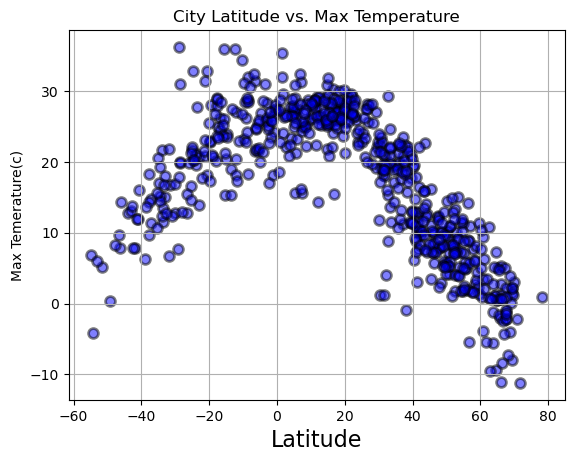

In [77]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_read["Lat"].astype(float)
y_values= city_data_read["Max Temp"]
plt.scatter(x_values,y_values, c ="blue", linewidths = 2,  
            edgecolor ="black", 
            s = 50, alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude",fontsize=16, color='black')
plt.ylabel("Max Temerature(c)")
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Latitude_Temp.png")
plt.grid()
# Show plot
plt.show()

#### Latitude Vs. Humidity

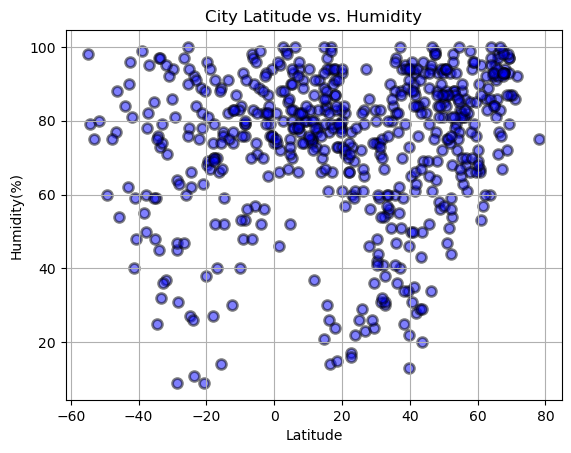

In [78]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_read["Lat"].astype(float)
y_values= city_data_read["Humidity"]
plt.scatter(x_values,y_values, c ="blue", linewidths = 2,  
            edgecolor ="black", 
            s = 50, alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Latitude_Humidity.png")
plt.grid()

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

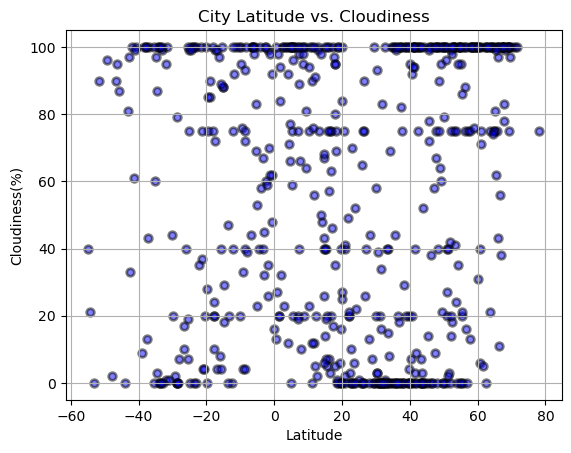

In [79]:
# Build the scatter plots for latitude vs. cloudiness
x_values= city_data_read["Lat"].astype(float)
y_values= city_data_read["Cloudiness"]
plt.scatter(x_values,y_values, c ="blue", linewidths = 2,  
            edgecolor ="black", 
            s = 30, alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Latitude_cloudiness.png")
plt.grid()
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

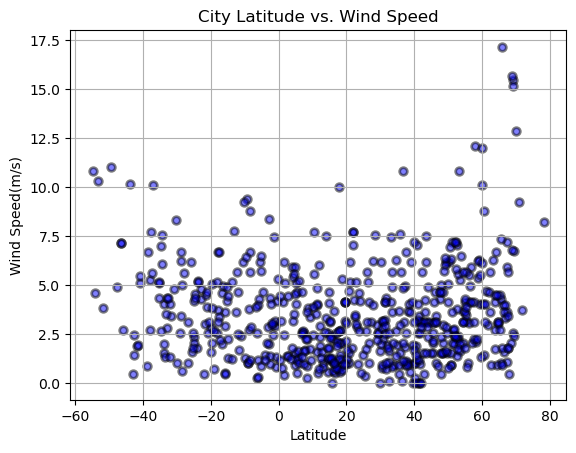

In [80]:
# Build the scatter plots for latitude vs. wind speed
x_values= city_data_read["Lat"].astype(float)
y_values= city_data_read["Wind Speed"]
plt.scatter(x_values,y_values, c ="blue", linewidth= 2, 
           edgecolor= "black",
           s = 30, alpha= 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Latitude_WindSpeed.png")
plt.grid()
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def liner_regression(x_values,y_values,x_label,y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' +str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    x_annotation = min(x_values)
    y_annotation = max(y_values)
    plt.annotate(line_eq, (x_annotation, y_annotation), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"the r-value is: {rvalue}")
    plt.show()


In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_read[city_data_read["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,27.80,78,0,4.12,US,1697336535
1,tobelo,1.7284,128.0095,29.53,72,84,2.43,ID,1697336535
2,brody,50.0879,25.1503,14.51,85,100,5.05,UA,1697336535
3,gadzhiyevo,69.2551,33.3362,2.18,97,100,15.47,RU,1697336536
5,yellowknife,62.4560,-114.3525,10.79,86,0,5.66,CA,1697336443


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_read[city_data_read["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,21.66,78,99,2.33,PN,1697336536
6,carnarvon,-24.8667,113.6333,32.78,27,0,4.20,AU,1697336536
10,waitangi,-43.9535,-176.5597,12.75,84,0,10.15,NZ,1697336537
11,invercargill,-46.4000,168.3500,7.79,88,95,7.15,NZ,1697336537
12,port saint john's,-31.6229,29.5448,16.78,71,100,3.41,ZA,1697336538


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -0.8904664008457703


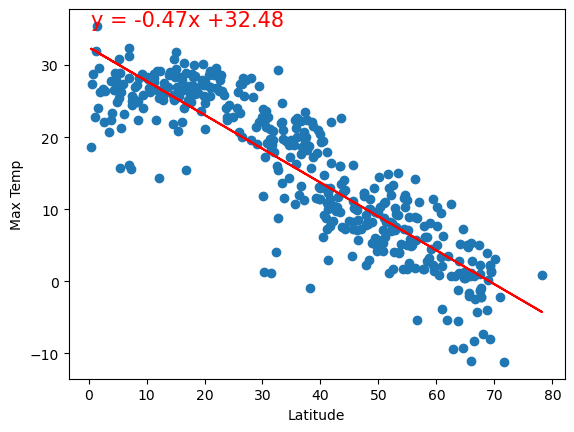

In [90]:
# Linear regression on Northern Hemisphere
liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp")


the r-value is: 0.7388752993372943


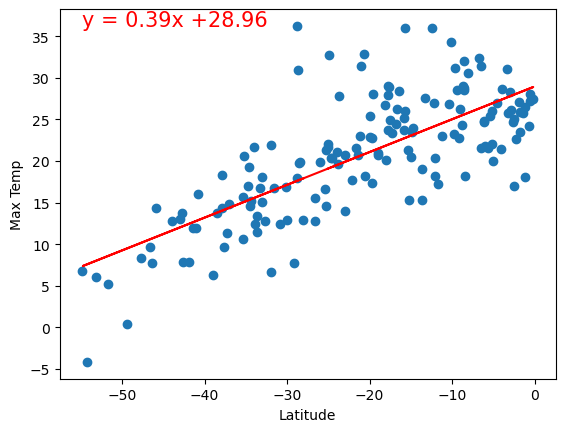

In [91]:
# Linear regression on Southern Hemisphere

# YOUR CODE HERE
liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp")


**Discussion about the linear relationship:** As we can observe, the latitude is directly related to max temperature of the city. when Latitude increases the temperature is decreasing. The r-value is coming closer to 1, which shows close relation. 

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.12079401423359819


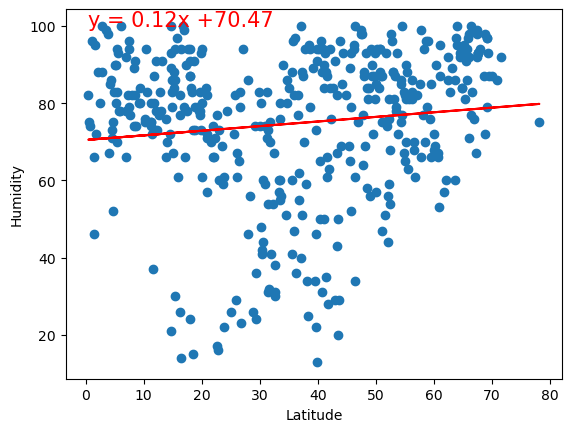

In [93]:
# Northern Hemisphere
# YOUR CODE HERE
liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity")

the r-value is: 0.11082132538566412


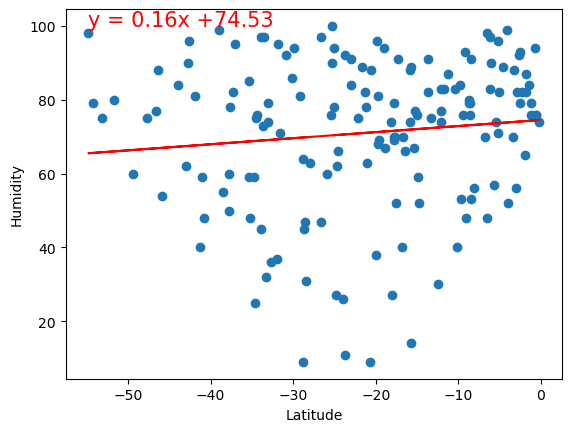

In [94]:
# Southern Hemisphere
# YOUR CODE HERE
liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity")

**Discussion about the linear relationship:** As we can observe, the Humidity is not directly related to Latitude of the city. The r-value is not closer to 1, which shows the 2 values are not related to each other, and are not increasing or decreasing together.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.18318393277234948


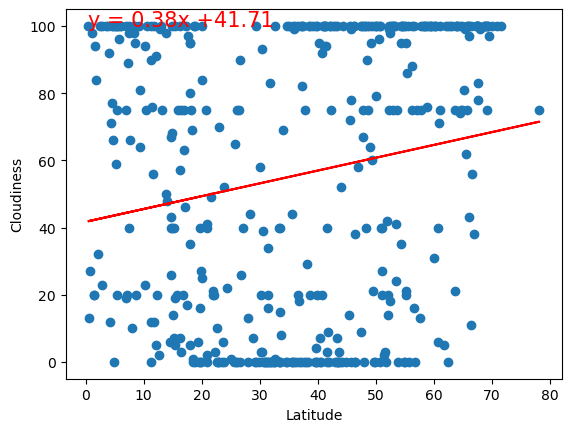

In [97]:
# Northern Hemisphere
# YOUR CODE HERE
liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")


the r-value is: 0.07822878798995755


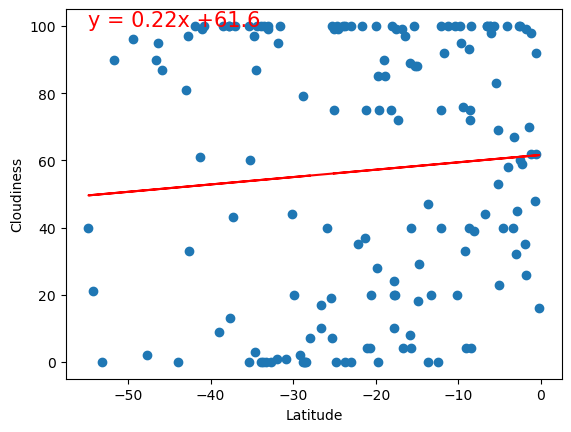

In [98]:
# Southern Hemisphere
# YOUR CODE HERE
liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness")


**Discussion about the linear relationship:** As we can observe, the Cloudiness is not directly related to Latitude of the city. The r-value is not closer to 1, which shows the 2 values are not related to each other, and are not increasing or decreasing together.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.27393044298917313


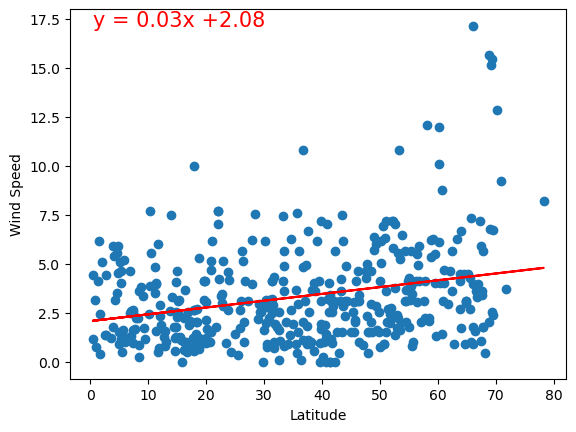

In [100]:
# Northern Hemisphere
liner_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")


the r-value is: -0.25166235862589414


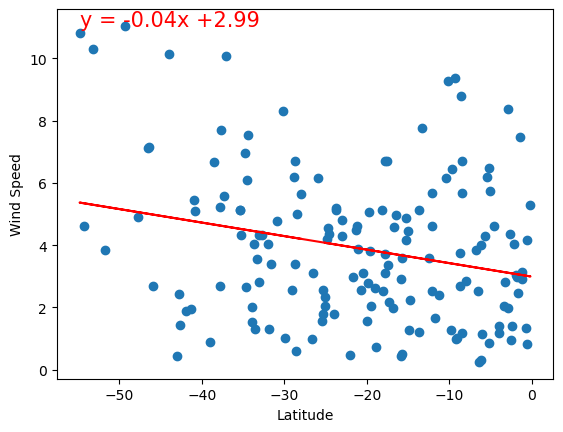

In [101]:
# Southern Hemisphere
liner_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

**Discussion about the linear relationship:** As we can observe, Wind Speed is slightly increasing when Latitude is increasing, while r-value is not closer to 1, hence we cannot establish any direct relation between the two values, but the graph shows some relation.